## Abstract

The World Happiness Report measures global happiness through surveys collected by the Gallup World Poll. Answers are collected based on a Cantril ladder life question. Participants are asked to think of lifestyles on a ladder, with their ideal and best possible life being at a 10, or the top of the ladder, and their worst possible life at a 0, or the very bottom of the ladder. They are then asked to rate their own lives on this scale along with seven main observed factors that may contribute to their responses. These seven factors are: economic production, social support, life expectancy, freedom, perceptions of corruption, generosity, and positive and negative affect. This dataset features data collected from 2013-2018. For the purpose of this project, I decided to focus on the most recent data collected, 2018.

Happiness records are significant in recognizing the emotional and mental wellbeing of groups of people, and can, therefore, be used to make informed decisions on a governmental and organizational level to help improve quality of life for the general population. These reports can also be used to assess international progression. With this dataset, we can look at world happiness and use a variety of factors, such as social support and finances, to evaluate their potential impact on happiness.
Kaggle Link for Dataset: https://www.kaggle.com/datasets/unsdsn/world-happiness/

### Data Collection Method
This data was collected in the form of surveys through a poll, mkaing it an observational study.

### Variables

Dependent Variable: Happiness score (Cantril Ladder Life question score)

Independent Variable: seven explanatory variables
- Per Capita Income (Log GDP per capita)
- Social support
- Healthy Life expectancy (Healthy life expectancy at birth)
- Freedom of Choice (Freedom to make life choices)
- Generosity
- Perceived corruption (Perceptions of corruption)
- Positive and Negative affect

## Research Question

What factors are significant predictors of people's happiness?

### Hypotheses

##### Null Hypothesis: None of the seven explanatory variables have a significant impact on people's happiness score as measured by the Cantril ladder life question.

This null hypothesis assumes that there is no relationship or predictive power between the independent variables (the seven explanatory variables) and the dependent variable (happiness score).

##### Alternative Hypothesis: At least one of the seven explanatory variables has a significant impact on people's happiness score as measured by the Cantril ladder life question.

This alternative hypothesis suggests that there is a relationship between at least one of the explanatory variables and the happiness score.

## Reading the CSV and Renaming Columns


In [19]:
#READING THE CSV AND RENAMING COLUMNS

import pandas as pd
url = "https://raw.githubusercontent.com/rkasa01/DATA602_ASSIGNMENT7/main/world-happiness-report.csv"
df1 = pd.read_csv(url)


I began by reading the csv file for the data collected in the world happiness report. I wanted to take a look at the variable names so that I could start changing some of them, and so that I could see what variables I was working with and what needed to be kept or changed.

In [32]:
import pandas as pd

# Renaming columns
df1.rename(columns={
    'Country name': 'Country',
    'Year': 'Year',
    'Healthy life expectancy at birth': 'Healthy Life Expectancy',
    'Freedom to make life choices': 'Freedom of Choice',
    'Perceptions of corruption': 'Perceived Corruption',
    'Log GDP per capita': 'Per Capita Income',
    'Social support': 'Social Support',
    'Negative affect': 'Negative Affect',
    'Positive affect': 'Positive Affect'
}, inplace=True)

print(df1.columns)


Index(['Country', 'Year', 'Life Ladder', 'Per Capita Income', 'Social Support',
       'Healthy Life Expectancy', 'Freedom of Choice', 'Generosity',
       'Perceived Corruption', 'Positive Affect', 'Negative Affect'],
      dtype='object')



I started by renaming the variables to make them easier to work with.

## Managing Missing Data


In [33]:
# GLOBAL SUMMARY STATISTICS (2018) AND FILTERING MISSING DATA
df_2018 = df1[df1['Year'] == 2018]

print(df_2018.describe())


         Year  Life Ladder  Per Capita Income  Social Support  \
count   126.0   126.000000         126.000000      126.000000   
mean   2018.0     5.542738           9.397825        0.809492   
std       0.0     1.091376           1.180323        0.119275   
min    2018.0     2.694000           6.635000        0.485000   
25%    2018.0     4.840250           8.523750        0.738250   
50%    2018.0     5.492000           9.563500        0.841000   
75%    2018.0     6.247000          10.360500        0.909750   
max    2018.0     7.858000          11.645000        0.966000   

       Healthy Life Expectancy  Freedom of Choice  Generosity  \
count               126.000000         126.000000  126.000000   
mean                 64.521762           0.784730   -0.023540   
std                   6.987445           0.116287    0.159352   
min                  48.200000           0.374000   -0.335000   
25%                  58.750000           0.719000   -0.136250   
50%                  66.

I first filtered out all of the years, except for the one we were working with: 2018. Here, I noticed that there is some missing data, so I decided to filter those out before analyzing the summary statistics.



In [34]:
# Removing rows missing values
df_2018.dropna(inplace=True)
print(df_2018.describe())


         Year  Life Ladder  Per Capita Income  Social Support  \
count   126.0   126.000000         126.000000      126.000000   
mean   2018.0     5.542738           9.397825        0.809492   
std       0.0     1.091376           1.180323        0.119275   
min    2018.0     2.694000           6.635000        0.485000   
25%    2018.0     4.840250           8.523750        0.738250   
50%    2018.0     5.492000           9.563500        0.841000   
75%    2018.0     6.247000          10.360500        0.909750   
max    2018.0     7.858000          11.645000        0.966000   

       Healthy Life Expectancy  Freedom of Choice  Generosity  \
count               126.000000         126.000000  126.000000   
mean                 64.521762           0.784730   -0.023540   
std                   6.987445           0.116287    0.159352   
min                  48.200000           0.374000   -0.335000   
25%                  58.750000           0.719000   -0.136250   
50%                  66.

<ipython-input-34-bca473ef1b46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018.dropna(inplace=True)


In [41]:
df_2018


,Country,Year,Life Ladder,Per Capita Income,Social Support,Healthy Life Expectancy,Freedom of Choice,Generosity,Perceived Corruption,Positive Affect,Negative Affect
10,Afghanistan,2018,2.694,7.692,0.508,52.6,0.374,-0.094,0.928,0.424,0.405
22,Albania,2018,5.004,9.518,0.684,68.7,0.824,0.009,0.899,0.713,0.319
31,Algeria,2018,5.043,9.348,0.799,65.9,0.583,-0.146,0.759,0.591,0.293
49,Argentina,2018,5.793,10.032,0.900,68.8,0.846,-0.211,0.855,0.820,0.321
64,Armenia,2018,5.062,9.451,0.814,66.9,0.808,-0.163,0.677,0.581,0.455
...,...,...,...,...,...,...,...,...,...,...,...
1863,Uruguay,2018,6.372,9.980,0.917,69.0,0.876,-0.097,0.683,0.877,0.275
1877,Uzbekistan,2018,6.205,8.818,0.921,65.1,0.970,0.318,0.520,0.825,0.209
1906,Vietnam,2018,5.296,8.934,0.832,67.9,0.909,-0.041,0.808,0.692,0.191
1931,Zambia,2018,4.041,8.167,0.718,55.3,0.791,0.048,0.811,0.703,0.351


In [14]:
pip install pandas statsmodels

ERROR: Operation cancelled by user


## Data Visualization

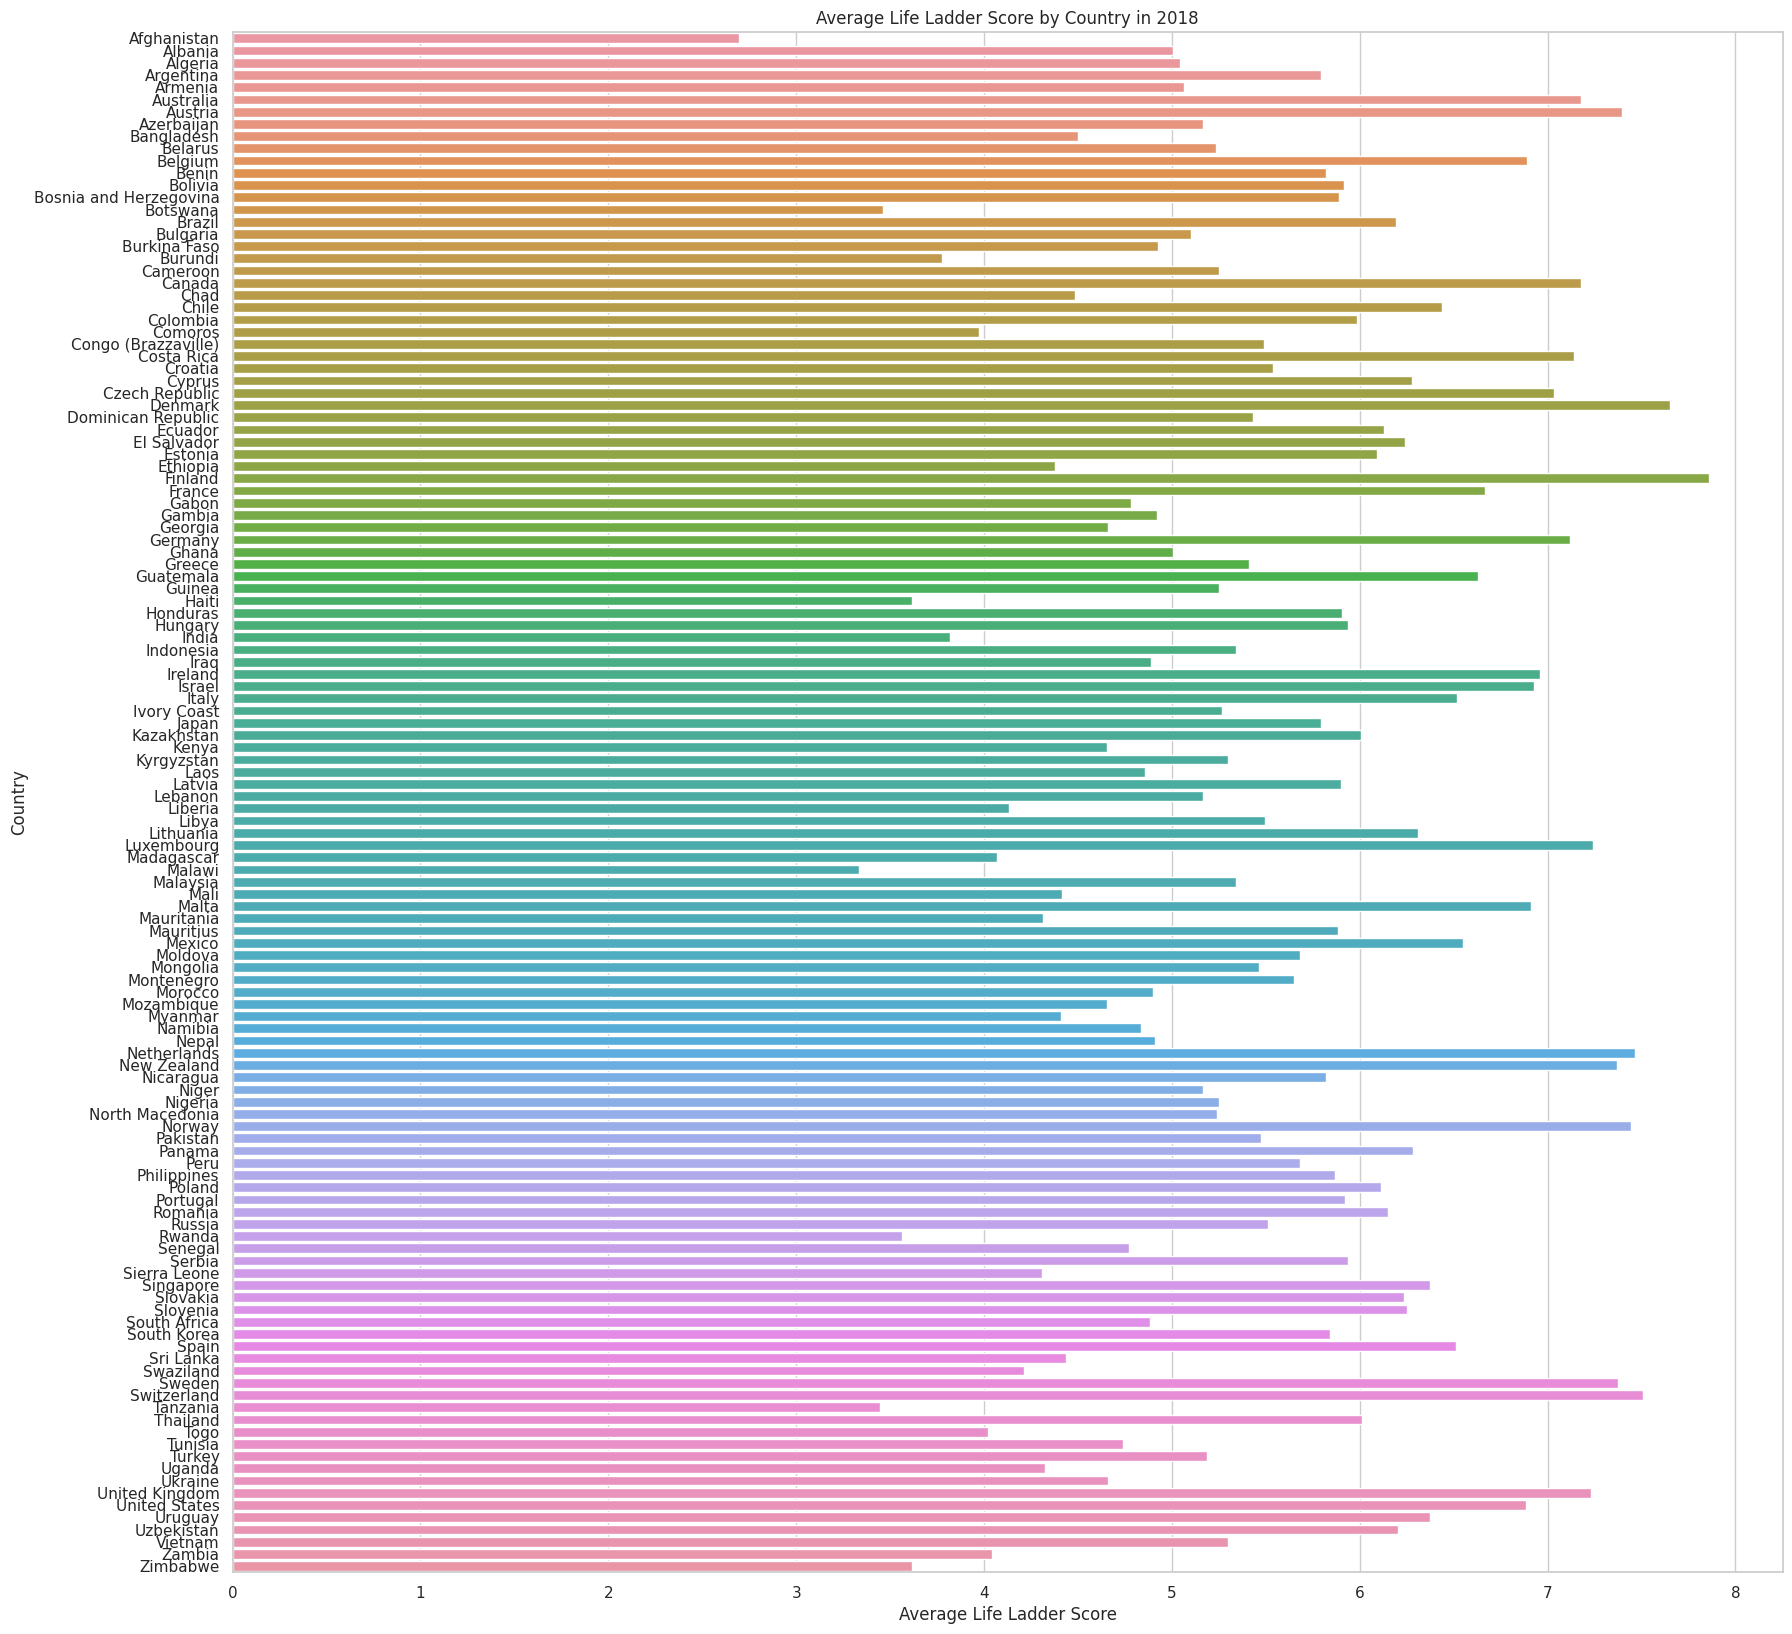

In [66]:
# DATA VISUALIZATION

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(20, 20))
sns.barplot(x='Life Ladder', y='Country', data=df_2018)

plt.xlabel('Average Life Ladder Score')
plt.ylabel('Country')
plt.title('Average Life Ladder Score by Country in 2018')

# Display the plot
plt.show()


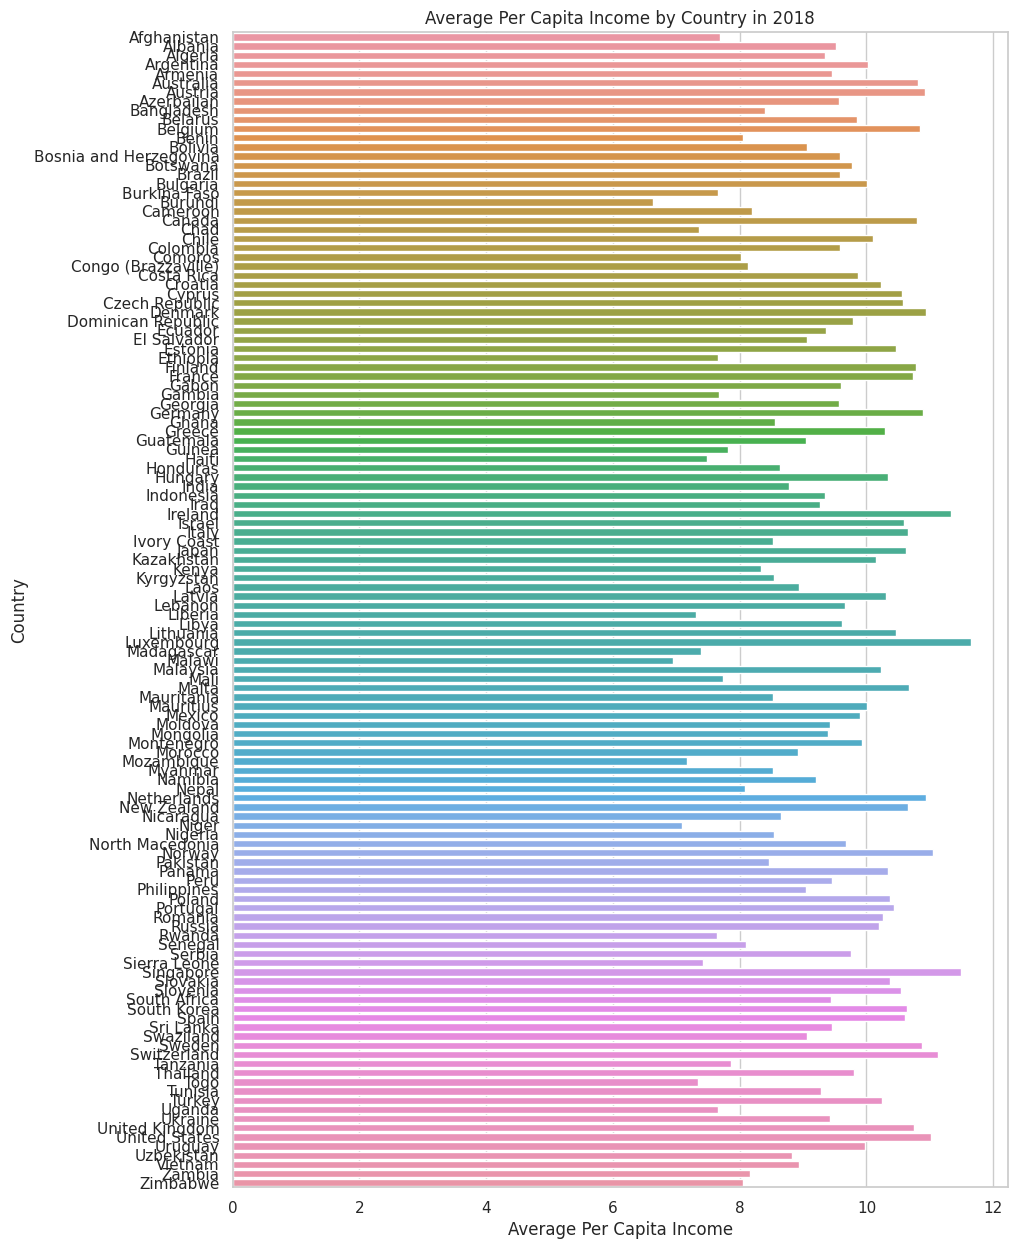

In [52]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 15))
sns.barplot(x='Per Capita Income', y='Country', data=df_2018)

plt.xlabel('Average Per Capita Income')
plt.ylabel('Country')
plt.title('Average Per Capita Income by Country in 2018')

plt.show()


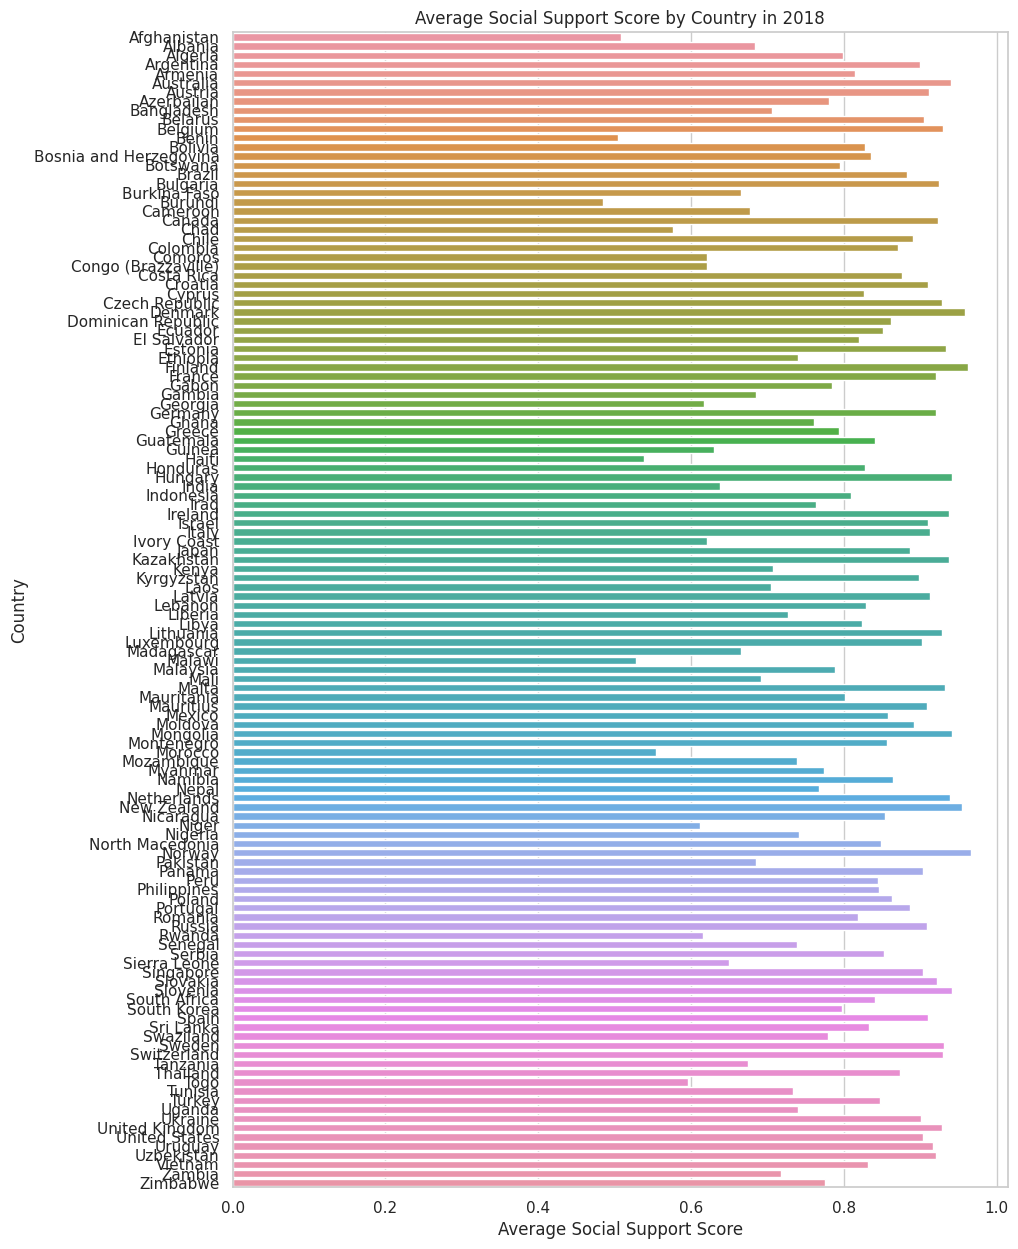

In [53]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 15))
sns.barplot(x='Social Support', y='Country', data=df_2018)

plt.xlabel('Average Social Support Score')
plt.ylabel('Country')
plt.title('Average Social Support Score by Country in 2018')

plt.show()


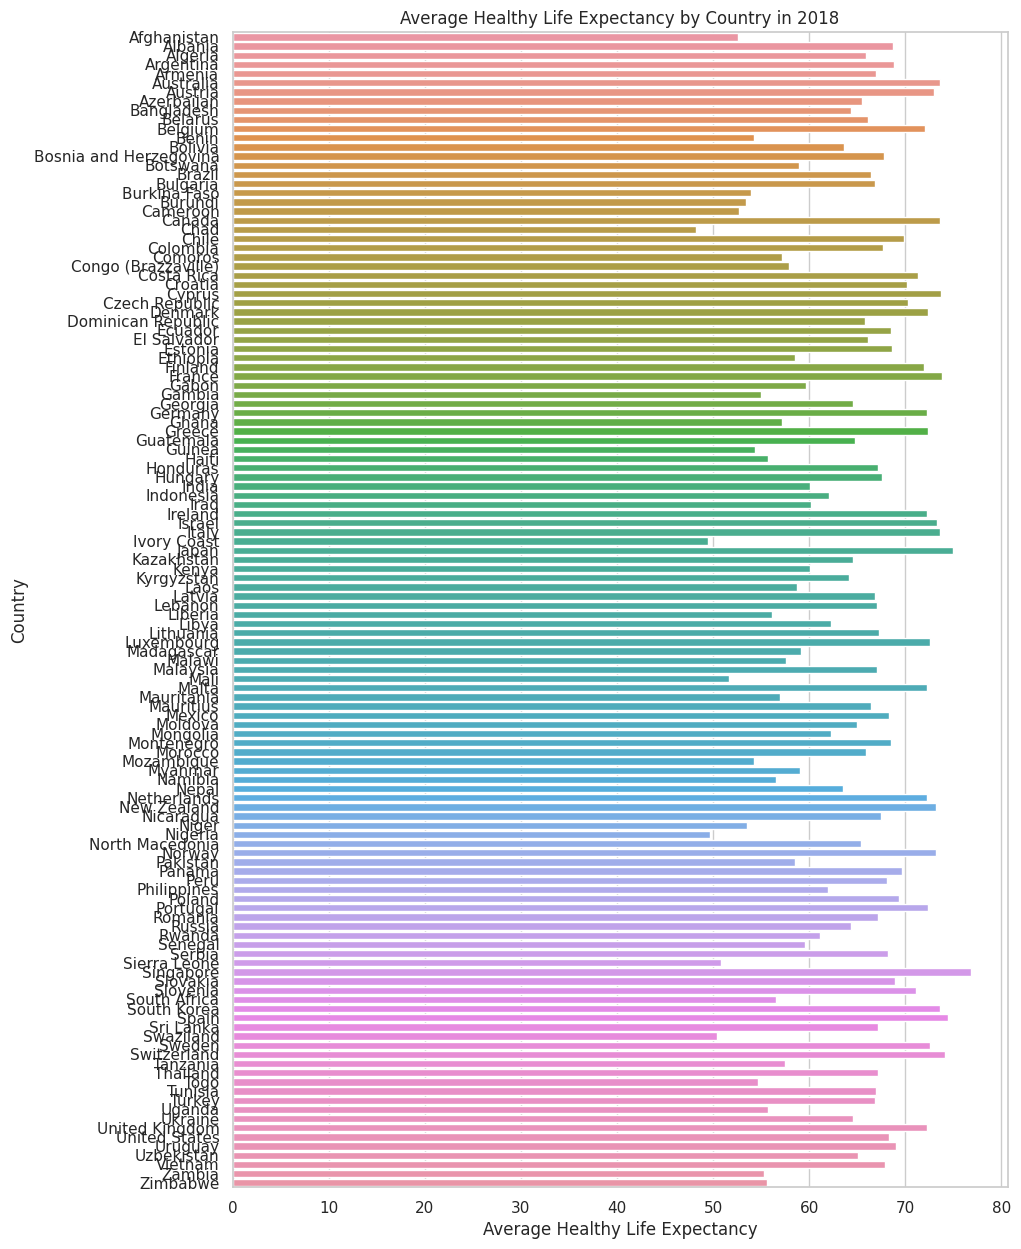

In [55]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 15))
sns.barplot(x='Healthy Life Expectancy', y='Country', data=df_2018)

plt.xlabel('Average Healthy Life Expectancy')
plt.ylabel('Country')
plt.title('Average Healthy Life Expectancy by Country in 2018')

plt.show()

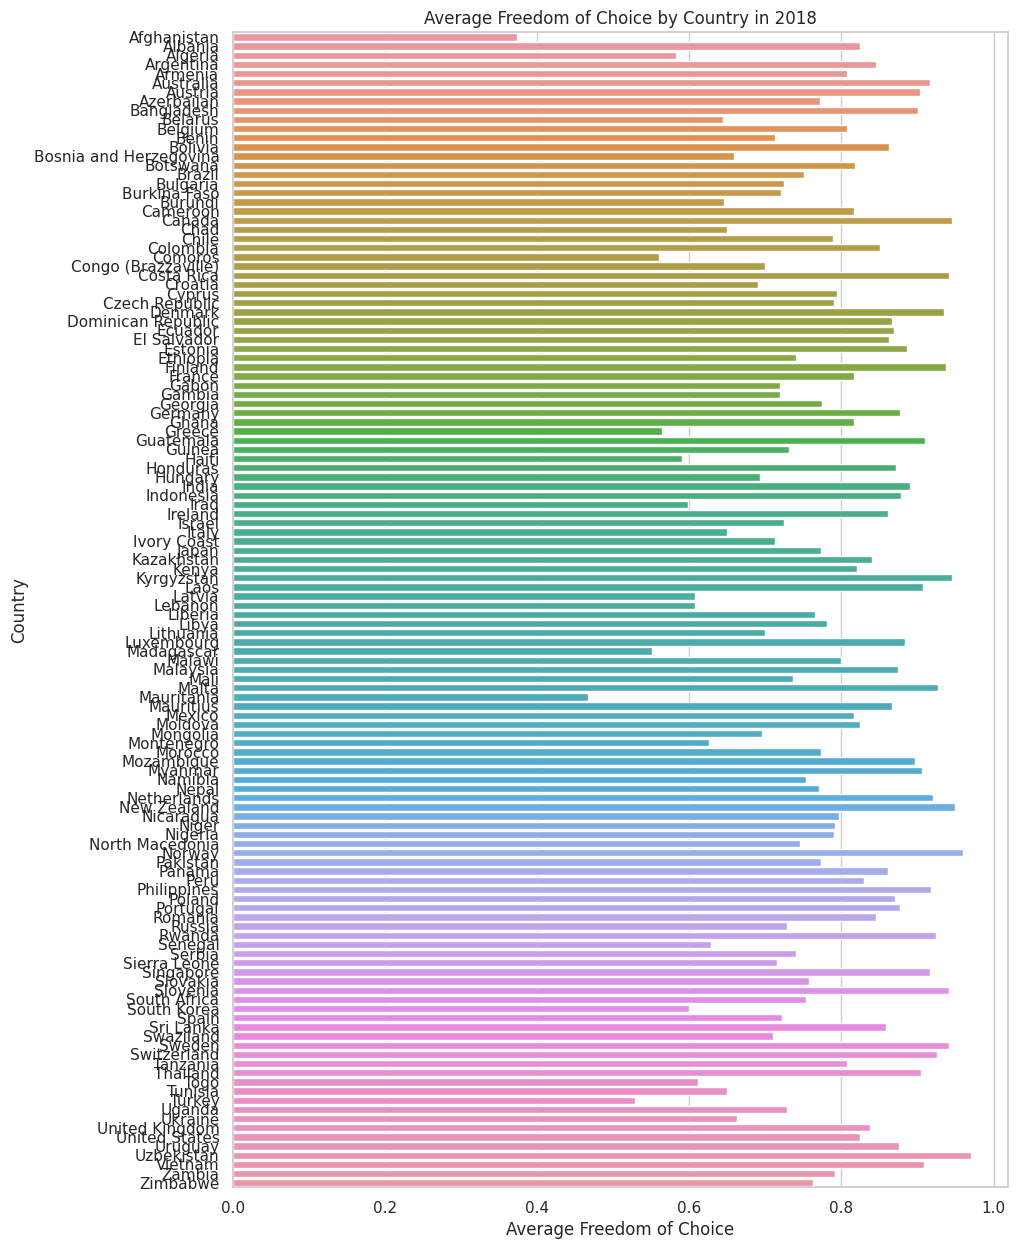

In [57]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 15))
sns.barplot(x='Freedom of Choice', y='Country', data=df_2018)

plt.xlabel('Average Freedom of Choice')
plt.ylabel('Country')
plt.title('Average Freedom of Choice by Country in 2018')

plt.show()

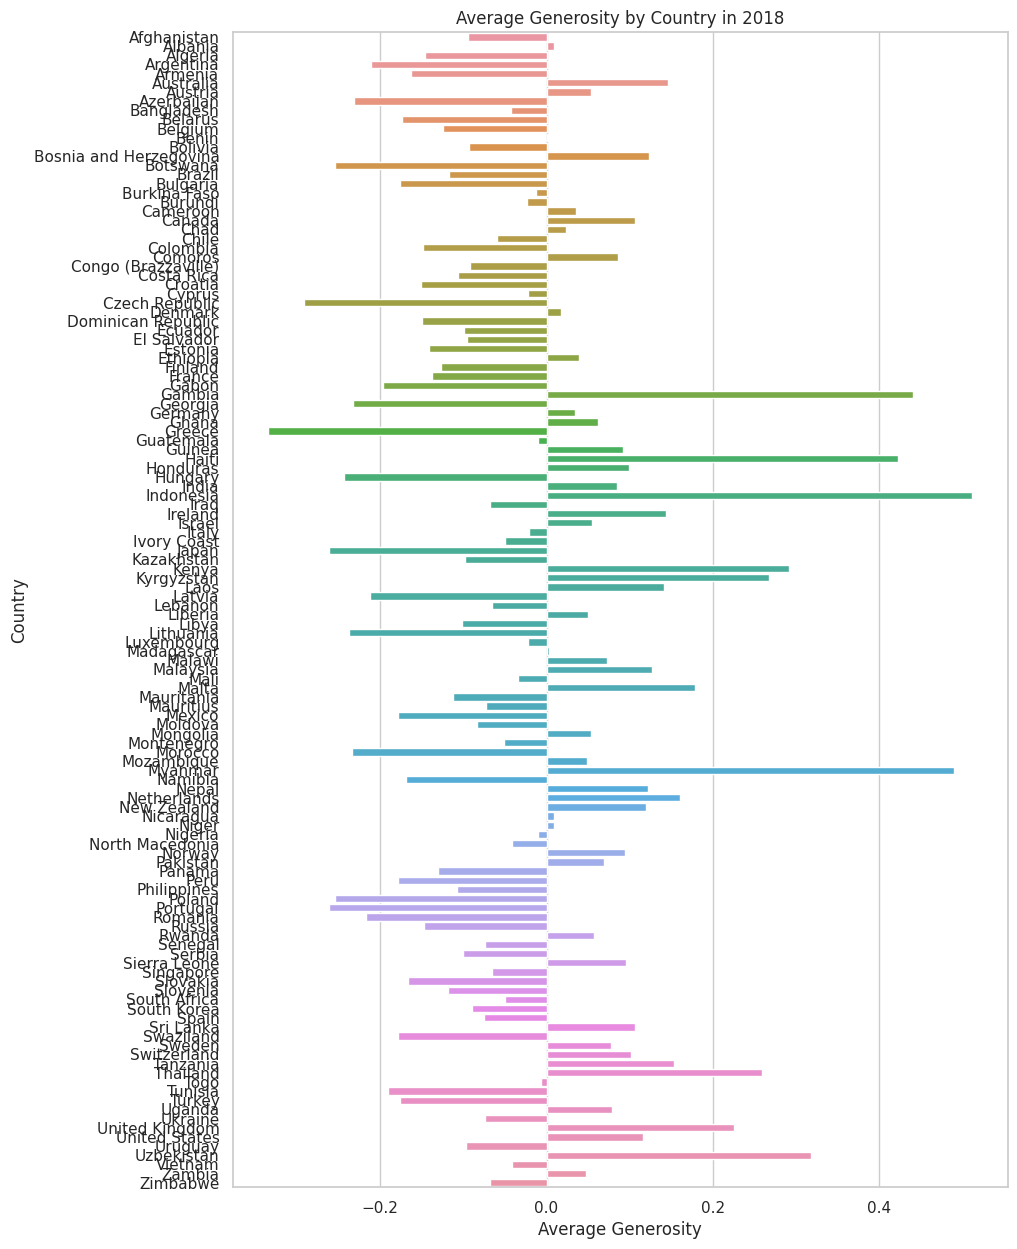

In [58]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 15))
sns.barplot(x='Generosity', y='Country', data=df_2018)

plt.xlabel('Average Generosity')
plt.ylabel('Country')
plt.title('Average Generosity by Country in 2018')

plt.show()

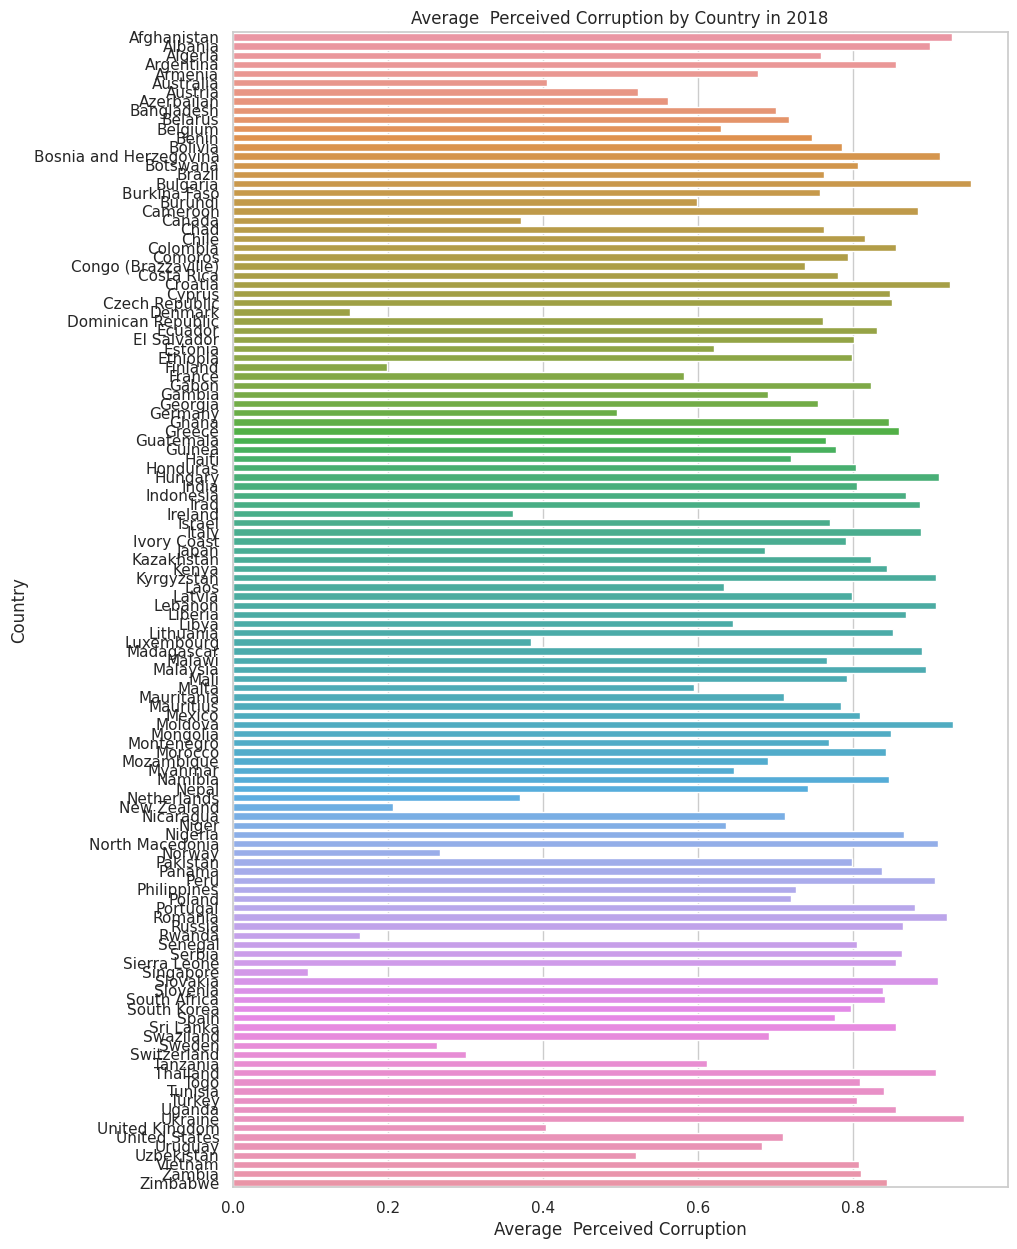

In [59]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 15))
sns.barplot(x= 'Perceived Corruption', y='Country', data=df_2018)

plt.xlabel('Average  Perceived Corruption')
plt.ylabel('Country')
plt.title('Average  Perceived Corruption by Country in 2018')

plt.show()

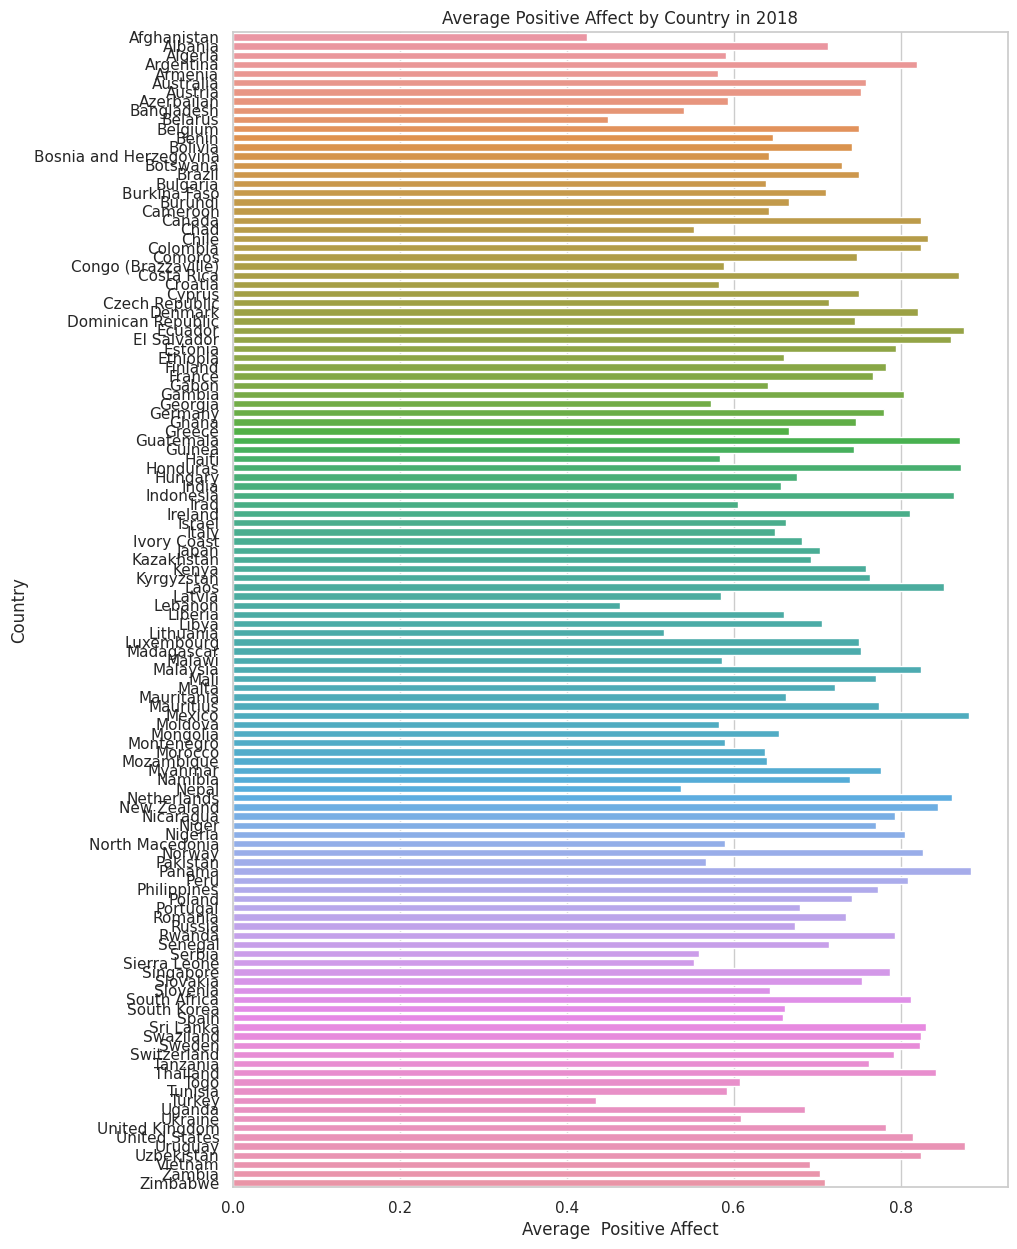

In [60]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 15))
sns.barplot(x= 'Positive Affect', y='Country', data=df_2018)

plt.xlabel('Average  Positive Affect')
plt.ylabel('Country')
plt.title('Average Positive Affect by Country in 2018')

plt.show()

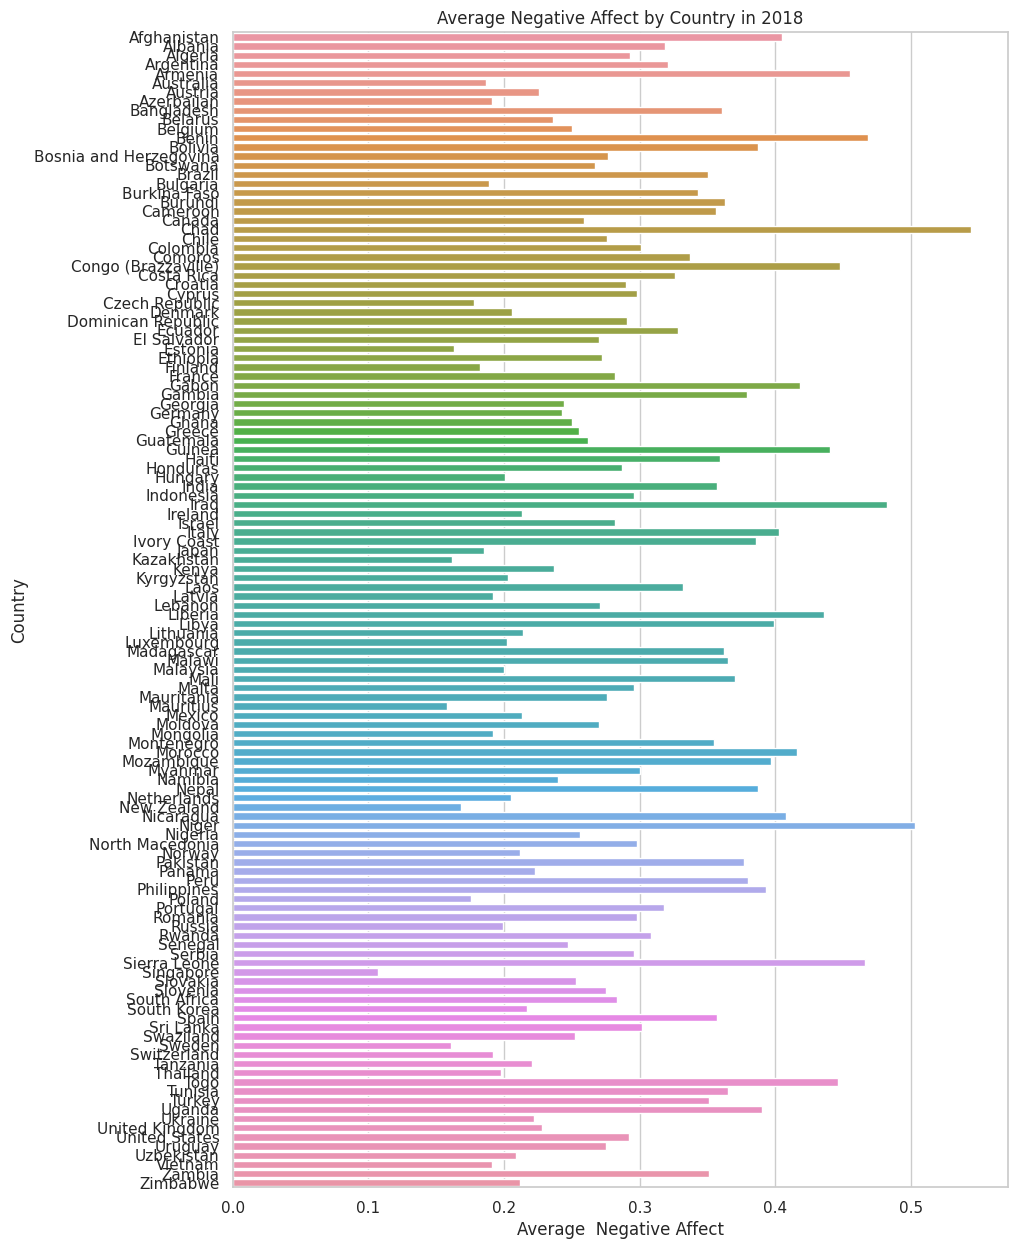

In [61]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 15))
sns.barplot(x= 'Negative Affect', y='Country', data=df_2018)

plt.xlabel('Average  Negative Affect')
plt.ylabel('Country')
plt.title('Average Negative Affect by Country in 2018')

plt.show()

## Regression Analyis

In [38]:
import pandas as pd
import statsmodels.api as sm

# REGRESSION ANALYSIS

X = df_2018[['Per Capita Income', 'Social Support',
       'Healthy Life Expectancy', 'Freedom of Choice', 'Generosity',
       'Perceived Corruption', 'Positive Affect', 'Negative Affect']]
y = df_2018['Life Ladder']  # Assuming this is your target variable

# Add a constant to the predictor variables (needed for statsmodels)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     50.62
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.77e-34
Time:                        02:02:10   Log-Likelihood:                -95.088
No. Observations:                 126   AIC:                             208.2
Df Residuals:                     117   BIC:                             233.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Overall, based on the coefficients' significance levels and the model's R-squared value, it seems that Per.Capita.Income, Social.Support, Healthy.Life.Expectancy, Perceived.Corruption, and Positive and Negative Affect are statistically significant predictors of the Life Ladder score in this model. I was surprised to see that healthy life expectancy did not have as significant of an impact as I would have thought.Generosity and Freedom.of.Choice on the other hand, do not appear to have a statistically significant impact. It looks like economic production however, was the most significant factor contribution to overall happiness.

Because of the multiple r-squared value, 0.761, approximately 76.1% of the variance in Life Ladder scores is explained by the independent variables.

The positive and negative affect are indicative of emotional and mental state of the general population. I would argue that those with a lower positive affect, and especially those with a higher negative affect, are countries which require improved conditions for a higher quality of life, and mental health resources. This type of information can be used for advocacy.

# Limitations

It would be interesting to compare this data with that of another year. Comparing data across time and then correlating to important events in history can help to also determine what impacts happiness and how. It would also be useful to have more recent data, to keep the data relevant. Another limitation could be from the data collection method. The sample which was surveyed has to be an accurate reflection of the population, and that may or may not have been the case for every country.

# Conclusion

To conclude, it looks like economic production is the most significant contributing factor to happiness. There is a reason people say that money buys happiness! This type of research, along with the analysis performed, can be used to improve quality of life all over the world. In the future, I would use this data set to compare what makes people the unhappiest, and work from there.